# Lab #1 - Data Preprocessing [Iris Data]
---

**Author : Aman Hussain**

**Reg. no. : 15BCE1077**

**Email : aman.hussain2015@vit.ac.in**
***

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data

In [2]:
iris=pd.read_csv('irisdata.csv')
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 1. Data Preprocessing

In [3]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### 1.A Null Values

In [5]:
iris[iris['sepal_length_cm'].isnull()|
    iris['sepal_width_cm'].isnull()|
    iris['petal_length_cm'].isnull()|
    iris['petal_width_cm'].isnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


**Since, we have only 150 data points of which 5 have NaN values, we must not drop them and instead fill them up with some aggregate values like mean.**

In [6]:
petal_width_mean = iris.loc[(iris['class']=='Iris-setosa','petal_width_cm')].mean()

**Filling up the NaN values with the mean of petal width measurements**

In [7]:
iris['petal_width_cm'].fillna(petal_width_mean,inplace=True)

In [8]:
iris.head(15)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.20,Iris-setosa
1,4.9,3.0,1.4,0.20,Iris-setosa
2,4.7,3.2,1.3,0.20,Iris-setosa
3,4.6,3.1,1.5,0.20,Iris-setosa
4,5.0,3.6,1.4,0.20,Iris-setosa
5,5.4,3.9,1.7,0.40,Iris-setosa
6,4.6,3.4,1.4,0.30,Iris-setosa
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa


### 1.B Class Labels

**Total unique classes of species must be 3.**

In [9]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

**We must correct the spellings of the species.**

In [10]:
iris.loc[iris['class']=='Iris-setossa', 'class'] = 'Iris-setosa'

In [11]:
iris.loc[iris['class']=='versicolor', 'class'] = 'Iris-versicolor'

In [12]:
print('Total unique classes of species: {}'\
      .format(len(iris['class'].unique())))

Total unique classes of species: 3


### 1.C Anomalous Values

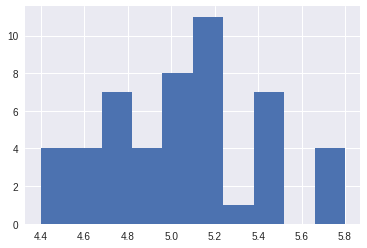

In [13]:
iris.loc[iris['class']=='Iris-setosa', 'sepal_length_cm'].hist()

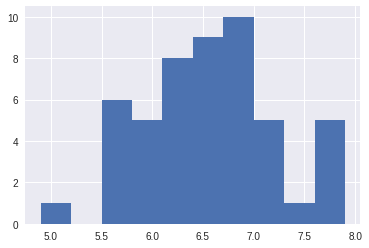

In [14]:
iris.loc[iris['class']=='Iris-virginica', 'sepal_length_cm'].hist()

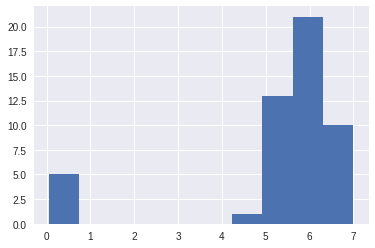

In [15]:
iris.loc[iris['class']=='Iris-versicolor', 'sepal_length_cm'].hist()

**Here we can see that 50 data points belonging to Iris-Versicolor has its sepal lenght measurements below 1cm, which is very unusual given the precise measurements.**

**After further investigation, we find out that those low values are actually measuremnents in metres. So, we transform the measurements to its appropriate values.**

In [16]:
iris.loc[(iris['class']=='Iris-versicolor') & (iris['sepal_length_cm'] < 1),\
        'sepal_length_cm'] *= 100

**Here, we find the expected distribution of measurements.**

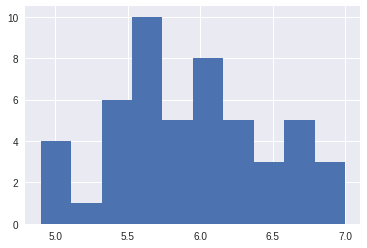

In [17]:
iris.loc[iris['class']=='Iris-versicolor', 'sepal_length_cm'].hist()

### 1.D Saving the Clean Data

In [20]:
iris.to_csv('irisdata_clean.csv')

## 2. Iris Data Visualization

In [26]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.838667,3.054667,3.758667,1.203667
std,0.804416,0.433123,1.764420,0.763252
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2.A Pairwise Scatterplot

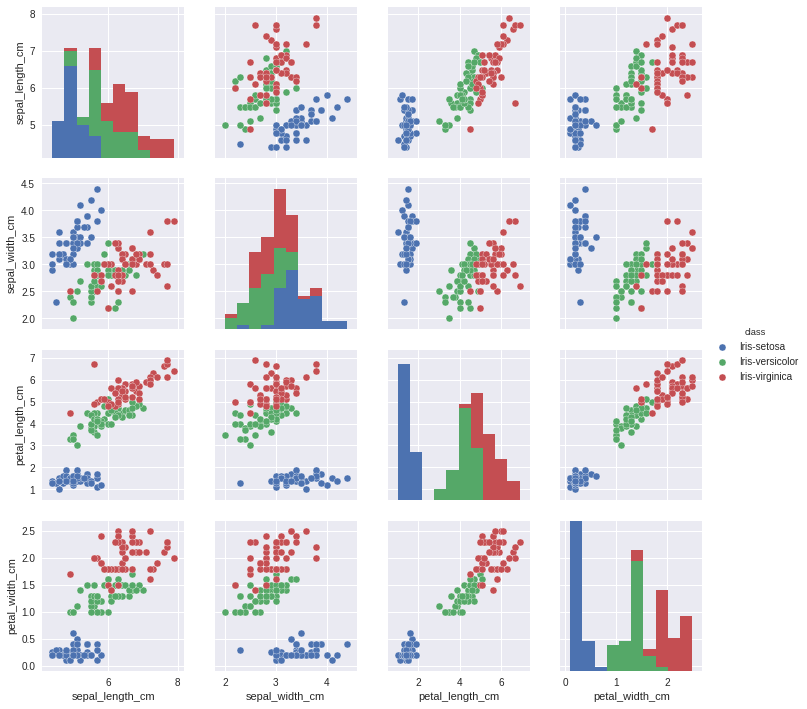

In [19]:
sns.pairplot(iris, hue='class')

### 2.B Box Plot

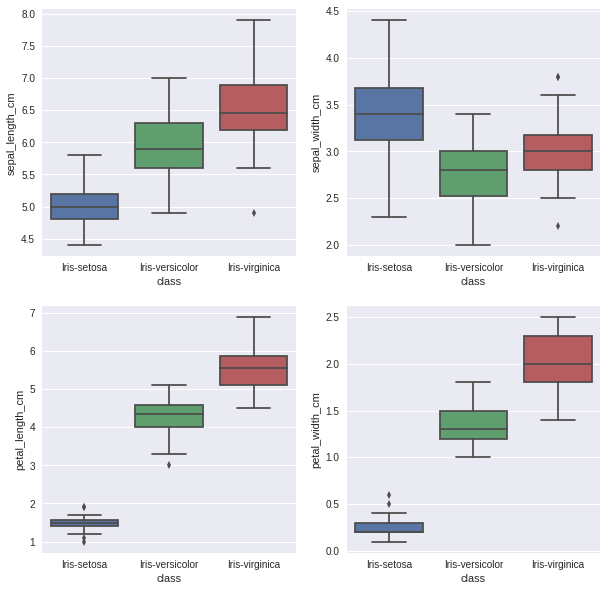

In [41]:
plt.figure(figsize=(10,10))

for column_index, column in enumerate(iris.columns):
    if column == "class":
        continue
    sb = plt.subplot(2,2,column_index+1)
    sns.boxplot(x='class',y=column, data=iris)

### 2.C Violinplot

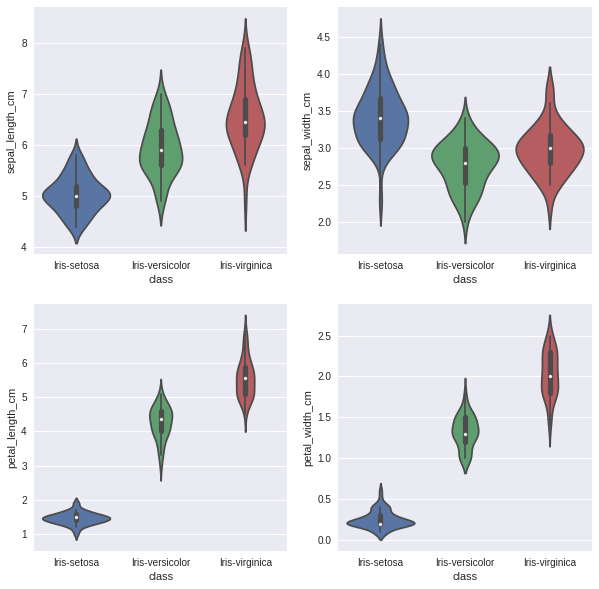

In [42]:
plt.figure(figsize=(10,10))

for column_index, column in enumerate(iris.columns):
    if column == "class":
        continue
    plt.subplot(2,2,column_index+1)
    sns.violinplot(x='class',y=column, data=iris)

### 2.C RadViz

RadViz is a way of visualizing multi-variate data. It is based on a simple spring tension minimization algorithm. Basically you set up a bunch of points in a plane. In our case they are equally spaced on a unit circle. Each point represents a single attribute. You then pretend that each sample in the data set is attached to each of these points by a spring, the stiffness of which is proportional to the numerical value of that attribute (they are normalized to unit interval). The point in the plane, where our sample settles to (where the forces acting on our sample are at an equilibrium) is where a dot representing our sample will be drawn. Depending on which class that sample belongs it will be colored differently.

In [43]:
from pandas.tools.plotting import radviz

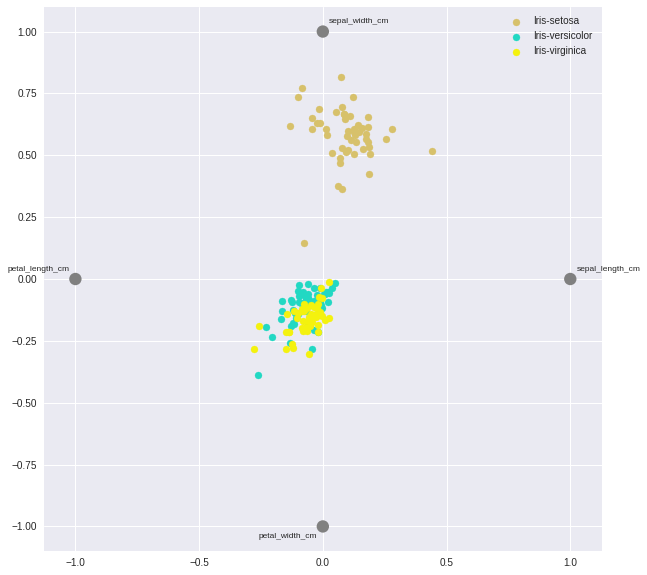

In [45]:
plt.figure(figsize=(10,10))
radviz(frame = iris,class_column = 'class')

### 2.D Parallel Coordinates

Parallel coordinates is a plotting technique for plotting multivariate data. It allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

In [46]:
from pandas.tools.plotting import parallel_coordinates

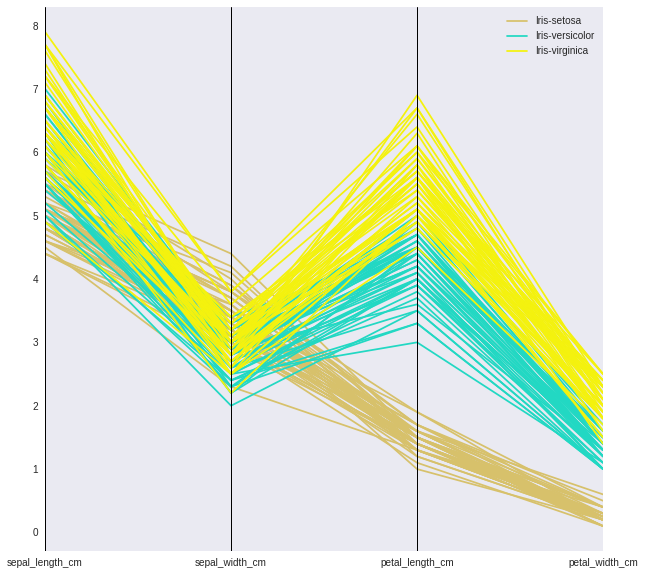

In [47]:
plt.figure(figsize=(10,10))
parallel_coordinates(frame=iris, class_column='class')

## Conclusion

**Hence, we can confidently say that a correlation exists and the data is linearly separable into three distinct classes of Iris flower species.**